### HW Part 3:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
sample_size = 100

groupA = np.random.normal(10, 10, sample_size)
groupB = np.random.normal(70, 10, sample_size)
groupC = np.random.normal(40, 10, sample_size)

category = ['GroupA']*sample_size + ['GroupB']*sample_size + ['GroupC']*sample_size

df = pd.DataFrame({'value': np.concatenate([groupA, groupB, groupC]),
                   'category': category})

In [3]:
# groups
groupA = df[df['category']=='GroupA']['value']
groupB = df[df['category']=='GroupB']['value']
groupC = df[df['category']=='GroupC']['value']

# Perform a paired t-test
F_statistic, p_value = stats.f_oneway(groupA, groupB, groupC)

# Get means
mean_groupA = groupA.mean()
mean_groupB = groupB.mean()
mean_groupC = groupC.mean()

# Print the results
print("T-statistic:", F_statistic)
print("P-value:", p_value)
print("Mean groupA:", mean_groupA)
print("Mean groupB:", mean_groupB)
print("Mean groupC:", mean_groupC)

T-statistic: 895.2162662463397
P-value: 1.7453569110604664e-126
Mean groupA: 9.500631930216496
Mean groupB: 70.46672932370923
Mean groupC: 40.899810846831826


In [4]:
# round them in order to make the chart more readable at the end
F_statistic = round(F_statistic,2)
p_value = round(p_value,5) # more decimal since it's a lower value in general
mean_groupA = round(mean_groupA,2)
mean_groupB = round(mean_groupB,2)
mean_groupC = round(mean_groupC,2)

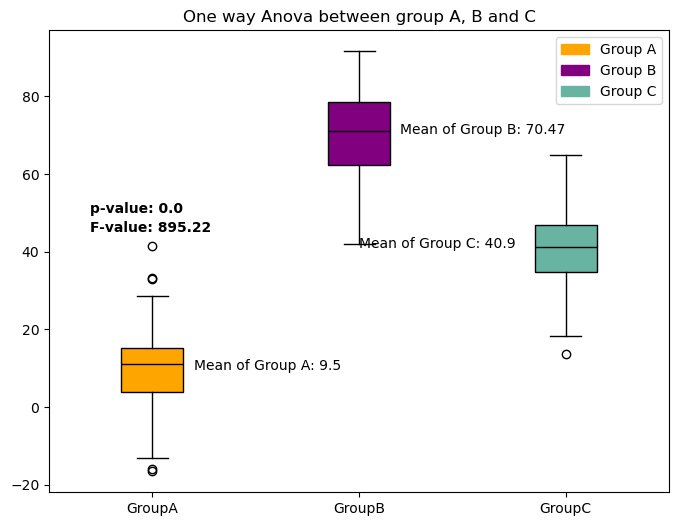

In [5]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('category')['value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=grouped.groups.keys(),
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    ) 

# Define colors for each group
colors = ['orange', 'purple', '#69b3a2']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)
    
# Add the p value and the t
p_value_text = f'p-value: {p_value}'
ax.text(0.7, 50, p_value_text, weight='bold')
f_value_text = f'F-value: {F_statistic}'
ax.text(0.7, 45, f_value_text, weight='bold')

# Add the mean for each group
ax.text(1.2, mean_groupA, f'Mean of Group A: {mean_groupA}', fontsize=10)
ax.text(2.2, mean_groupB, f'Mean of Group B: {mean_groupB}', fontsize=10)
ax.text(2, mean_groupC, f'Mean of Group C: {mean_groupC}', fontsize=10)

# Add a title and axis label
ax.set_title('One way Anova between group A, B and C')

# Add a legend
legend_labels = ['Group A', 'Group B', 'Group C']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

# Display it
plt.show()

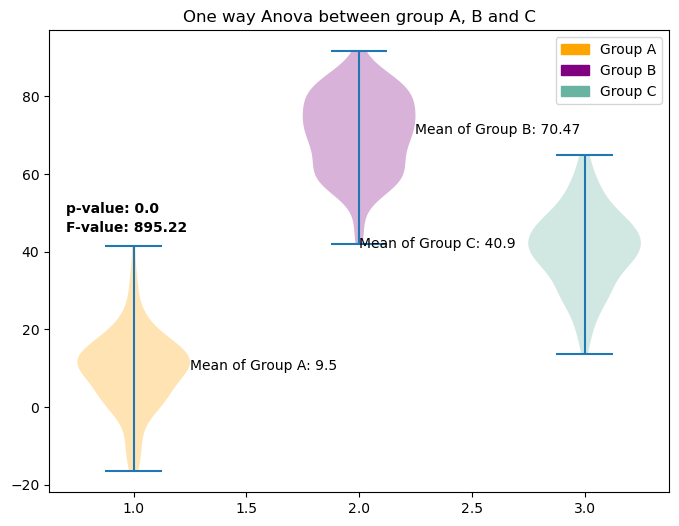

In [6]:
#now for the violin plot
# Group our dataset with our 'Group' variable
grouped = df.groupby('category')['value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
violins = ax.violinplot([group.values for name, group in grouped],
                     #labels=grouped.groups.keys()
                    ) 

# Define colors for each group
colors = ['orange', 'purple', '#69b3a2']

# Assign colors to each box in the boxplot
for violin, color in zip(violins['bodies'], colors):
    violin.set_facecolor(color)
    
# Add the p value and the t
p_value_text = f'p-value: {p_value}'
ax.text(0.7, 50, p_value_text, weight='bold')
F_value_text = f'F-value: {F_statistic}'
ax.text(0.7, 45, F_value_text, weight='bold')

# Add the mean for each group
ax.text(1.25, mean_groupA, f'Mean of Group A: {mean_groupA}', fontsize=10)
ax.text(2.25, mean_groupB, f'Mean of Group B: {mean_groupB}', fontsize=10)
ax.text(2, mean_groupC, f'Mean of Group C: {mean_groupC}', fontsize=10)

# Add a title and axis label
ax.set_title('One way Anova between group A, B and C')

# Add a legend
legend_labels = ['Group A', 'Group B', 'Group C']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

# Display it
plt.show()


I chose to make a violin chart not only because we haven't learned how to make these in class, but also because it is visually interesting to me and when reading about them I learned that they should be getting more attention than boxplots. You can see the distribution clearer than what is portrayed in the box and whisker plots that are so common all around. 

### Part 4: Pollinators

In [7]:
bee_df = pd.read_csv('bee data table - Sheet1.csv')

bee_df.head()

,Pollinator,Category of Pollinator,Visits to cucumber,Visits to eggplant,Visits to purple coneflower
0,Agapostemon virescens,sweat bee,7,3,136
1,Andrena spp.,mining bee,0,0,4
2,Anthidium manicatum,European wool carder bee,4,0,7
3,Apis mellifera,Western honey bee,72,3,13
4,Augochlora pura,sweat bee,3,0,0


The dataset represents the findings of how often different pollinators visit three different plants to see which types of plants are best suited to support various categories of pollinators. The plants were a cucumber, eggplant, and a coneflower. Each pollinator is listed in alphabetical order, includes the category of pollinator it falls in, and the number of times each pollinator visited each plant.

Data Attribute Types:

Pollinator: Categorical \
Category of Pollinator: Categorical \
Visits to cucumber: Quantitative \
Visits to eggplant: Quantitative \
visits to purple coneflower: Quantitative 

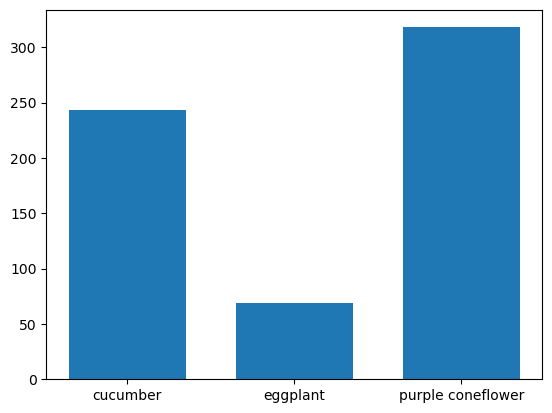

In [22]:
#set X columns with plant names
x=['cucumber', 'eggplant', 'purple coneflower']

#storing counts of visits
cucumber = 0
eggplant = 0
coneflower = 0

#get total visits for all types of bumble and sweat bees
for index, row in bee_df.iterrows():
    if row['Category of Pollinator'] in (['sweat bee', 'bumblebee', 'Two-spotted bumble bee', 'brown-belted bumblebee', 'Common eastern bumble bee']):
        cucumber += row['Visits to cucumber']
        eggplant += row['Visits to eggplant']
        coneflower += row['Visits to purple coneflower']

#assign totals to Y list
y= [cucumber, eggplant, coneflower]

#make bar plot
fig, axs = plt.subplots()
axs.bar(x, y, width=0.7)
plt.show()


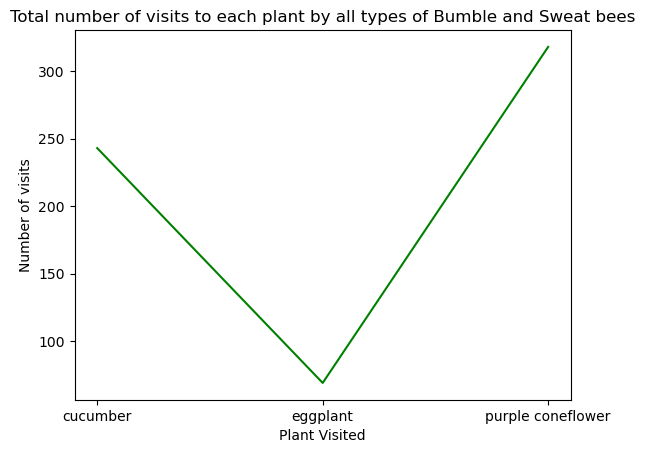

In [21]:
#make line chart
plt.plot(x,y, color='green')
plt.xlabel('Plant Visited')
plt.ylabel('Number of visits')
plt.title('Total number of visits to each plant by all types of Bumble and Sweat bees')
plt.show()


The bar chart is a more effective visualization to use in this case, because it uses position on a common scale and Length (for each bar) to compare magnitudes for each plant type. In comparison to the line chart, which uses a less effective channel in tilt, the bar chart has more effective channels and thus should be the more appropriate choice

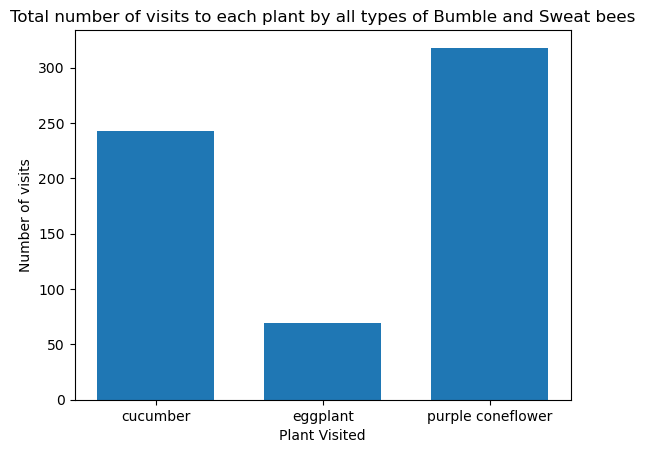

In [23]:
# polished bar chart 
fig, axs = plt.subplots()
axs.bar(x, y, width=0.7)
plt.xlabel('Plant Visited')
plt.ylabel('Number of visits')
plt.title('Total number of visits to each plant by all types of Bumble and Sweat bees')
plt.show()

Number 7 on part 4: compare and identify

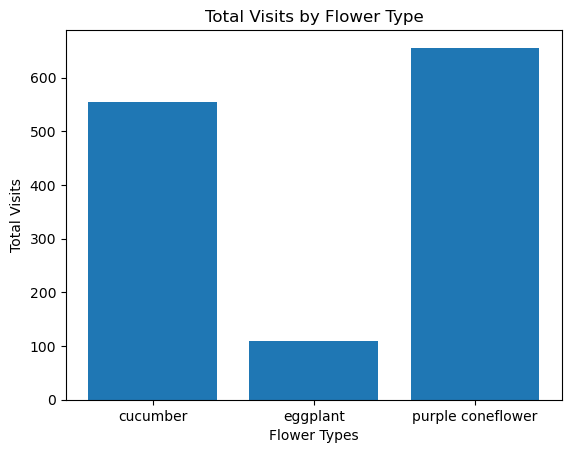

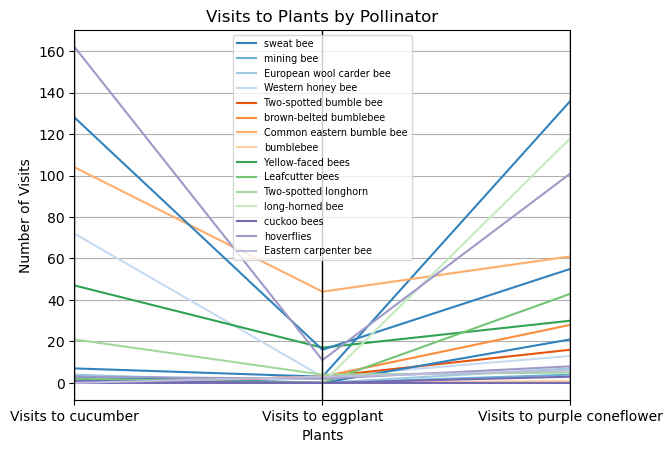

In [58]:
#Compare: creating bar chart 
# Sum visits across all pollinators
total_visits = bee_df[['Visits to cucumber', 'Visits to eggplant', 'Visits to purple coneflower']].sum()

#make barchart 
plt.bar(x, total_visits)
plt.xlabel('Flower Types')
plt.ylabel('Total Visits')
plt.title('Total Visits by Flower Type')
plt.show()

#creating parallel coordinates chart
colors = plt.cm.tab20c.colors  

# make parallel chart
pd.plotting.parallel_coordinates(bee_df, 'Category of Pollinator', color= colors, cols=['Visits to cucumber', 'Visits to eggplant', 'Visits to purple coneflower'])
plt.title('Visits to Plants by Pollinator')
plt.xlabel('Plants')
plt.ylabel('Number of Visits')
plt.legend(loc='upper center', fontsize='x-small')
plt.grid(True)
plt.show()


Identify:

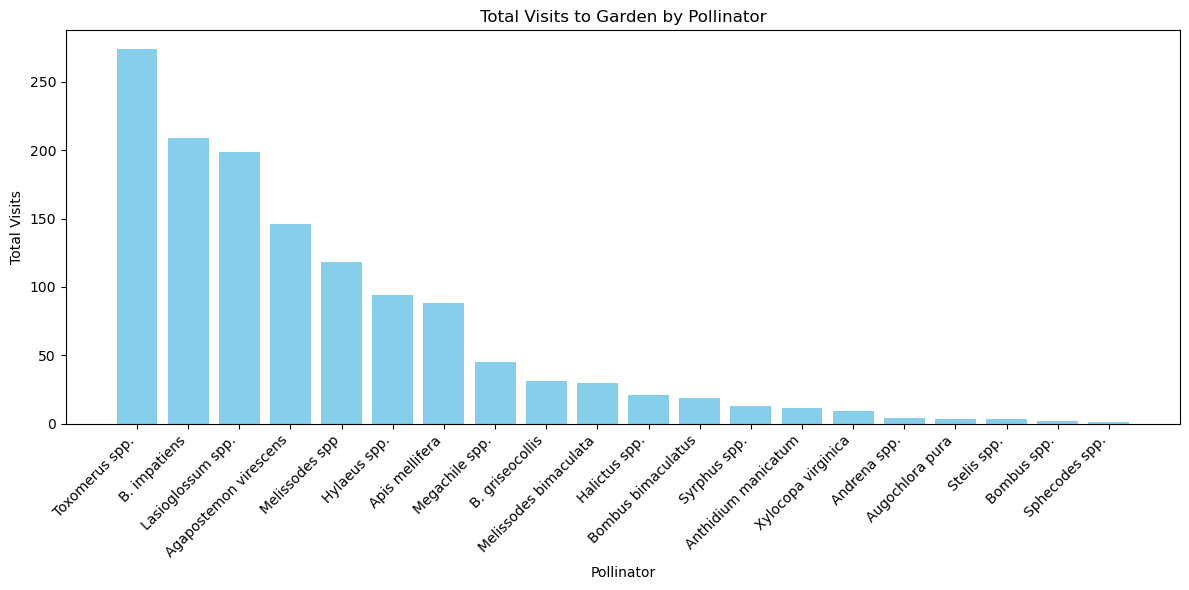

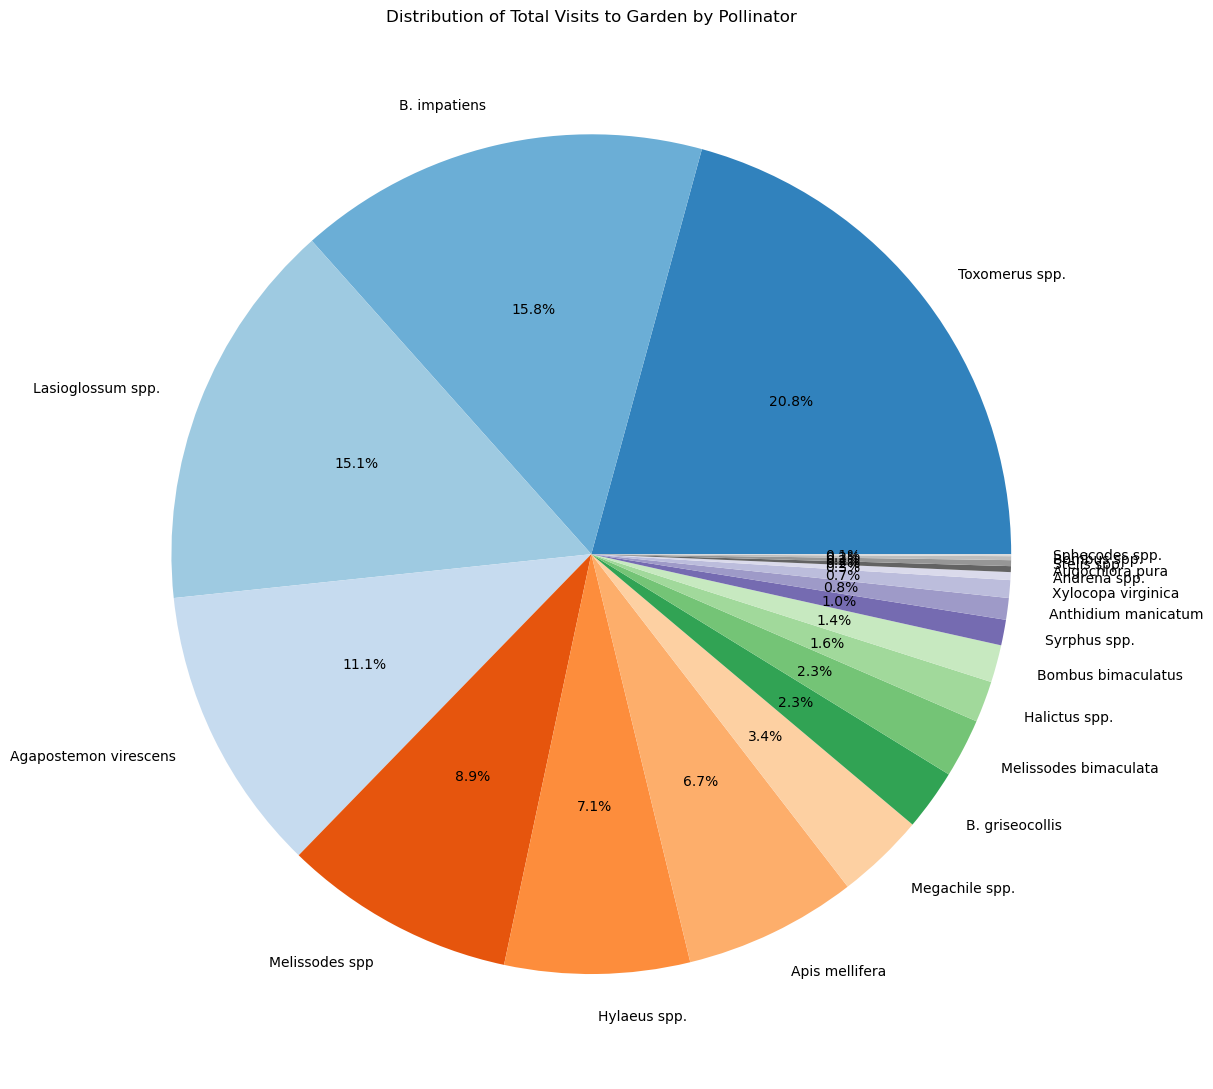

In [63]:
# Bar Chart
# Add total visits col
bee_df['Total Visits'] = bee_df[['Visits to cucumber', 'Visits to eggplant', 'Visits to purple coneflower']].sum(axis=1)

#sort df by Total Visits
df_sorted = bee_df.sort_values(by='Total Visits', ascending=False)

# make bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Pollinator'], df_sorted['Total Visits'], color='skyblue')
plt.xlabel('Pollinator')
plt.ylabel('Total Visits')
plt.title('Total Visits to Garden by Pollinator')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Pie Chart
#labels + sizes
labels = df_sorted['Pollinator']
sizes = df_sorted['Total Visits']
# added colormap to create unique colors
colors = plt.cm.tab20c.colors  

# Plotting
plt.figure(figsize=(14, 11))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Total Visits to Garden by Pollinator')
plt.tight_layout()
plt.show()

One of my main takeaways is that the eggplant has significantly been shown to not be a popular plant in general for all polinators. The cucumber and purple coneflower as a whole had far more visits from all types of pollinators. This was especially noticeable with the Toxomerus spp. pollinator from the parallel coordinates chart, which showed that even the most active pollinators very rarely went to the eggplant in comparison to the other two test plants. Another insight I took away was that many polinators that we saw were not as active as I expected. Also seen from the parallel coordinates chart was that around half of the pollinators in the data visited less than 30 plants in total. Thus I think that the parallel coordinates visualization was the most effective for this data set, as it can show both which plant was visited most in total as well as being able to show how many times each pollinator visited each plant